In [ ]:
## Valeria Pérez Cong
## Pregunta A.2: Datos abiertos de la cdmx 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [192]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Los datos se obtuvieron del siguiente [link](https://datos.cdmx.gob.mx/explore/dataset/carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico/export/?disjunctive.ao_hechos&disjunctive.delito&location=11,19.32993,-99.11968&dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6ImNhcnBldGFzLWRlLWludmVzdGlnYWNpb24tcGdqLWRlLWxhLWNpdWRhZC1kZS1tZXhpY28iLCJvcHRpb25zIjp7ImRpc2p1bmN0aXZlLmFvX2hlY2hvcyI6dHJ1ZSwiZGlzanVuY3RpdmUuZGVsaXRvIjp0cnVlfX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJDT1VOVCIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiM2NmMyYTUifV0sInhBeGlzIjoiYW9faGVjaG9zIiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D)

In [23]:
pgj = pd.read_csv('carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico.csv', delimiter=';')
pgj.shape

(871354, 18)

In [6]:
pgj.head(1)

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,2016.0,Diciembre,2016-12-31 22:11:00,HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (ATRO...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN TLAHUAC,TLH-1,UI-2SD,TLAHUAC,SANTA ANA PONIENTE,2017,Enero,2017-01-01 00:37:27,AVENIDA TLAHUAC,TURANDOT,-99.053535,19.302084,"19.3020842299,-99.0535354187"


### Pregunta 1

En términos muy sencillos podemos decir que ciencia de datos se trata de usar datos para contestar preguntas 
concretos. Por tanto, creo que la calidad de los datos depende de gran medida de la pregunta que buscamos contestar. 

+ Hay pasos "básicos" para medir la calidad como detectar errores, datos *raros* o datos faltantes. 


+ Otro paso de suma importancia es verificar si los datos son **relevantes y suficientes** a la pregunta que buscamos contestar. Puede que tengamos un volumen enorme de datos pero si no se relacionan a nuestro problema pues los datos no son de utilidad. Por otro lado, si tenemos justo la información que necesitamos pero con muy pocas observaciones es posible que las conclusiones a las que lleguemos sean poco confiables. 

In [26]:
pgj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871354 entries, 0 to 871353
Data columns (total 18 columns):
ao_hechos               870982 non-null float64
mes_hechos              870982 non-null object
fecha_hechos            871053 non-null object
delito                  871354 non-null object
categoria_delito        871354 non-null object
fiscalia                871354 non-null object
agencia                 871354 non-null object
unidad_investigacion    871129 non-null object
alcaldia_hechos         868268 non-null object
colonia_hechos          837068 non-null object
ao_inicio               871354 non-null int64
mes_inicio              871354 non-null object
fecha_inicio            871354 non-null object
calle_hechos            868979 non-null object
calle_hechos2           351067 non-null object
longitud                837831 non-null float64
latitud                 837831 non-null float64
geopoint                837831 non-null object
dtypes: float64(3), int64(1), object(14)


El set de datos cuenta con 18 columnas, de las cuales delito, categoria_delito, fiscalia, agencia, ao_inicio, mes_inicio, fecha_inicio no tienen valores nulos en los registros. Las columnas con más valores nulos son calle_hechos2, longitud, latitud, geopoint, colonia_hechos y alcadia_hechos. 

### Pregunta 2

In [27]:
# delitos registrados
pgj.shape[0]

871354

In [28]:
# delitos únicos
pgj.delito.nunique()

277

In [29]:
# categoría delito única
pgj.categoria_delito.nunique()

16

La tabla contiene registros de 871,354 delitos, y hay 277 valores únicos de delitos. Hay 16 categorías de delito. 

In [30]:
pgj.shape[0] - pgj[pgj.fecha_hechos.notnull()].shape[0]

301

In [33]:
(301 / pgj.shape[0]) * 100

0.034543939661721874

In [31]:
pgj.shape[0] - pgj[pgj.fecha_inicio.notnull()].shape[0]

0

En cuanto a las fechas de los hechos hay 301 registros (0.034% de los datos totales) que tienen valores vacíos; en el campo de fecha de inicio no hay valores vacíos. Solo para esos casos en que vamos la fecha de hechos en nula vamos a usar la fecha de inicio para que no haya problema con el análisis. 

In [50]:
pgj['fecha_hechos'] = np.where((pgj.fecha_hechos.isnull()) | (pgj.fecha_hechos.isna()), pgj.fecha_inicio, pgj.fecha_hechos)
pgj[pgj.fecha_hechos.notnull()].shape

(871354, 19)

In [58]:
pgj[pgj.fecha_hechos == 'NA NA']

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,date_hechos
169598,NaN,NaN,NA NA,ENCUBRIMIENTO,DELITO DE BAJO IMPACTO,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",57,UI-1CD,CUAUHTEMOC,NaN,2018,Julio,2018-07-21 00:55,NaN,NaN,NaN,NaN,NaN,NA NA
175368,NaN,NaN,NA NA,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-5,UI-3CD,MIGUEL HIDALGO,VERONICA ANZURES,2018,Septiembre,2018-09-18 04:24,BAHIA DE ASCENCIÓN,AV. MARINA NACIONAL,-99.173148,19.437942,"19.4379415901,-99.1731476017",NA NA
177996,NaN,NaN,NA NA,ROBO A OFICINA PÚBLICA SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN VENUSTIANO CARRANZA,VC-3,UI-1SD,VENUSTIANO CARRANZA,NaN,2018,Agosto,2018-08-01 09:30,NaN,NaN,NaN,NaN,NaN,NA NA
180170,NaN,NaN,NA NA,ROBO A NEGOCIO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-1SD,BENITO JUAREZ,NARVARTE,2018,Agosto,2018-08-10 02:25,EUGENIA (DATOS SIAP),NaN,-99.150555,19.384604,"19.3846038784,-99.1505553666",NA NA
187434,NaN,NaN,NA NA,LESIONES INTENCIONALES POR GOLPES,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-2SD,AZCAPOTZALCO,NaN,2018,Julio,2018-07-30 23:11,SIN CALLES DEL SAP,NaN,NaN,NaN,NaN,NA NA
187436,NaN,NaN,NA NA,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN ÁLVARO OBREGÓN,AO-3,UI-2CD,ALVARO OBREGON,NaN,2018,Julio,2018-07-30 23:21,SIN CALLES DEL SAP,NaN,NaN,NaN,NaN,NA NA
192947,NaN,NaN,NA NA,DDH SIN DATOS,HECHO NO DELICTIVO,INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE S...,A,Unidad 5,AZCAPOTZALCO,NaN,2019,Mayo,2019-05-16 13:13,SIN CALLES DEL SAP,NaN,NaN,NaN,NaN,NA NA
196370,NaN,NaN,NA NA,ROBO A PASAJERO A BORDO DE TRANSPORTE PÚBLICO ...,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN COYOACÁN,COY-1,UI-1CD,COYOACAN,BARRIO OXTOPULCO UNIVERSIDAD,2019,Marzo,2019-03-06 11:55,METRO MIGUEL ALGEL DE QUEVEDO,NaN,-99.180868,19.346453,"19.3464525974,-99.1808681995",NA NA
201615,NaN,NaN,NA NA,DDH SIN DATOS,HECHO NO DELICTIVO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-3CD,IZTAPALAPA,NaN,2019,Mayo,2019-05-24 12:00,NaN,NaN,NaN,NaN,NaN,NA NA
201685,NaN,NaN,NA NA,DDH SIN DATOS,HECHO NO DELICTIVO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-3SD,AZCAPOTZALCO,NaN,2019,Mayo,2019-05-24 16:15,NaN,NaN,NaN,NaN,NaN,NA NA


Por otro lado, también encontramos fecha de hechos con valores 'NA NA' o 'NA 00:00:00', por lo que haremos el mismo ejercico donde usamos fecha de inicio como fecha de hechos para que no haya problema.

In [62]:
pgj['fecha_hechos'] = np.where(pgj.fecha_hechos.str.contains('NA'), pgj.fecha_inicio, pgj.fecha_hechos)


In [65]:
pgj['fecha_hechos'] = pd.to_datetime(pgj['fecha_hechos'])


In [67]:
pgj['fecha_inicio'] = pd.to_datetime(pgj['fecha_inicio'])


In [82]:
pgj['year_hecho'] = pd.DatetimeIndex(pgj['fecha_hechos']).year

In [66]:
pgj.fecha_hechos.describe()

count                  871354
unique                 283304
top       2017-10-16 12:00:00
freq                      241
first     1906-06-02 19:00:00
last      2019-09-30 23:49:00
Name: fecha_hechos, dtype: object

In [73]:
pgj.fecha_hechos.max()

Timestamp('2019-09-30 23:49:00')

In [74]:
pgj.fecha_hechos.min()

Timestamp('1906-06-02 19:00:00')

In [68]:
pgj.fecha_inicio.describe()

count                  871354
unique                 752439
top       2018-09-12 18:00:00
freq                        8
first     2016-01-01 01:35:06
last      2019-09-30 23:59:57
Name: fecha_inicio, dtype: object

In [71]:
pgj[pgj.fecha_hechos < '2016-01-01 01:35:06'].fecha_hechos.describe()

count                   26597
unique                  13403
top       2014-05-30 12:00:00
freq                      142
first     1906-06-02 19:00:00
last      2016-01-01 01:30:00
Name: fecha_hechos, dtype: object

In [77]:
rango_fecha_inicio = (pgj.fecha_inicio.max() - pgj.fecha_inicio.min())
rango_fecha_inicio

Timedelta('1368 days 22:24:51')

In [78]:
rango_fecha_hechos = (pgj.fecha_hechos.max() - pgj.fecha_hechos.min())
rango_fecha_hechos

Timedelta('41393 days 04:49:00')

In [79]:
pgj[pgj.fecha_hechos == '1906-06-02 19:00:00']

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
352419,1906.0,Junio,1906-06-02 19:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,IZTAPALAPA,EL MOLINO TEZONCO,2016,Junio,2016-06-03 13:11:57,CALLE ZACAHUIZCO LT 1603 MZ 155,CUAUHTEMOC,-99.068833,19.30173,"19.3017298308,-99.0688332896"


In [93]:
pgj[pgj.fecha_hechos < '2016-01-01 01:35:06'].shape

(26597, 19)

In [95]:
(pgj[pgj.fecha_hechos < '2016-01-01 01:35:06'].shape[0] / pgj.shape[0] ) * 100

3.0523759574179956

En cuanto al rango de tiempo de los datos hay observaciones a considerar: 

+ Consideramos que la fecha de inicio es la fecha de apertura de la carpeta de investigación


+ Consideramos la fecha de hechos como la fecha en que el ciudadano o la autoridad reportan que ocurrieron los hechos. 


+ En cuanto a la fecha de inicio, la fecha mínima es 2016-01-01 y la máxima es 2019-09-30, lo cual es totalmente congruente con la información de los datos. El rango en días es de 1368 días. 


+ Por otro lado, aunque la fecha mínima de apertura de carpeta de investigación (fecha de inicio) es 2016-01-01, la fecha de los hechos en algunos casos va mucho más atrás. Incluso hay una fecha de hecho de 1906. Es altamente probable que esto sea un error de captura. Si tomamos esta fecha como la mínima (1906-06-02) y la fecha máxima como (2019-09-30) el rango de fechas es de 41393 días.

+ En total hay 26,597 registros de hechos que ocurren antes de la primera fecha de inicio, esto corresponde al 3.05% de los registros totales. 

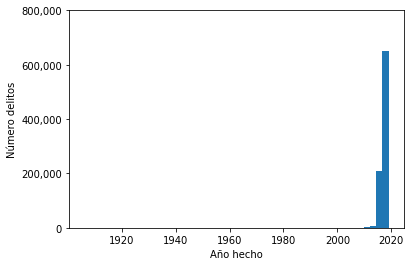

In [96]:
plt.hist(pgj.year_hecho, bins = 50)
plt.xlabel('Año hecho')
plt.ylabel('Número delitos')
plt.yticks([0, 200000, 400000, 600000, 800000], ["0", "200,000", "400,000", "600,000", "800,000"])
plt.show()

Aunque el año mínimo de hechos es 1906, vemos que hay una concentración de delitos entre el 2010 y 2020.

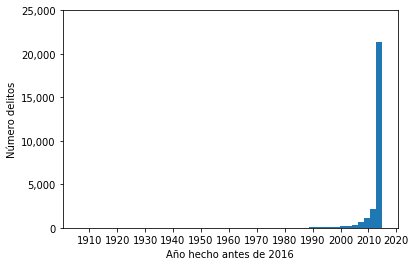

In [97]:
plt.hist(pgj[pgj.year_hecho < 2016].year_hecho, bins = 50)
plt.xlabel('Año hecho antes de 2016')
plt.ylabel('Número delitos')
plt.xticks(range(1910, 2030,10))
#plt.xlim([1900, 2015])
plt.yticks([0, 5000, 10000, 15000, 20000, 25000], ["0", "5,000", "10,000", "15,000", "20,000", "25,000"])
plt.show()

Aún considerando solo los delitos cuya fecha de hecho es menor a 2016 (fecha mínima de apertura de carpeta), los delitos se concentran entre el 2010 y el 2015. Realmente creemos que delitos de antes del 2015 son un error en captura. 

### Pregunta 3 - número de delitos

Dado que delitos es una variable categórica para conocer la distribución vamos a obtener una tabla de frecuencia de los delitos. Por facilidad, vamos a ver el número de registros y proporción por categoría de delito pues solo hay 16 valores. 


In [124]:
count_cat_delitos = pgj.groupby('categoria_delito')['delito'].count().reset_index().sort_values(by = 'delito', ascending = False)
count_cat_delitos.rename(columns = {'delito':'conteo'}, inplace = True)
count_cat_delitos["prop"] = np.round((count_cat_delitos.conteo / sum(count_cat_delitos.conteo) )* 100 , 4)
count_cat_delitos.head(5)

,categoria_delito,conteo,prop
0,DELITO DE BAJO IMPACTO,664760,76.2905
11,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,51663,5.9290
1,HECHO NO DELICTIVO,49821,5.7177
13,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,48378,5.5520
6,ROBO A NEGOCIO CON VIOLENCIA,14458,1.6593


Podemos ver que el 76.29% de los delitos tienen la categoría de "delito de bajo impacto". Hay 193 delitos distintos dentro de esta categoría.

In [133]:
pgj[pgj.categoria_delito == "DELITO DE BAJO IMPACTO"].delito.nunique()

193

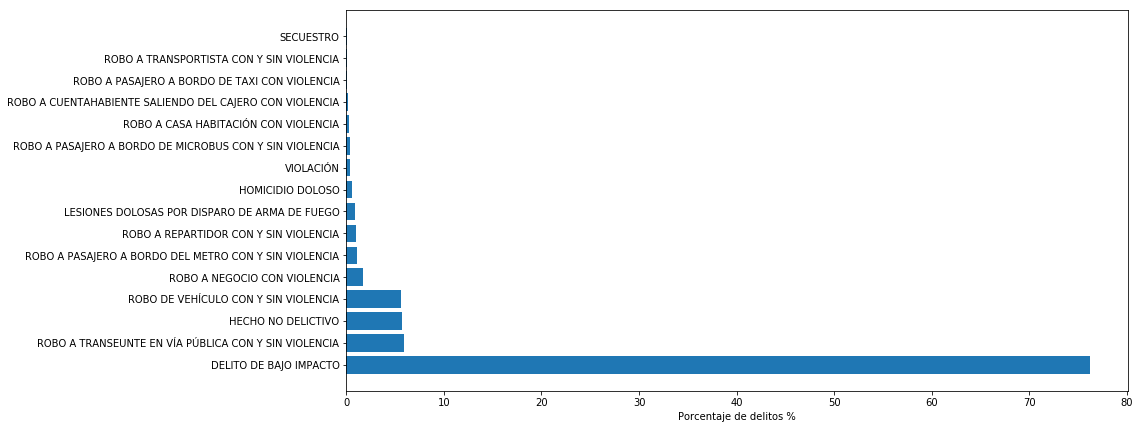

In [134]:
plt.figure(figsize = (14,7))
plt.barh(count_cat_delitos.categoria_delito, count_cat_delitos.prop)
#plt.xticks(rotation = 90)
plt.xlabel('Porcentaje de delitos %')
plt.show()

Siendo mucho más específicos vamos a ver la distribución de delitos. Por facilidad, vamos a considerar aquellos delitos que acumulan el 50% de los registros.

In [149]:
count_delitos = pgj.groupby('delito')['fecha_inicio'].count().reset_index().sort_values(by = 'fecha_inicio', ascending = False)
count_delitos.rename(columns = {'fecha_inicio':'conteo'}, inplace = True)
count_delitos["prop"] = np.round((count_delitos.conteo / sum(count_delitos.conteo) )* 100 , 4)
count_delitos = count_delitos.reset_index()
count_delitos = count_delitos.drop(columns='index')
count_delitos['prop_acum'] = count_delitos["prop"].cumsum()
count_delitos[count_delitos.prop_acum < 51]

,delito,conteo,prop,prop_acum
0,VIOLENCIA FAMILIAR,76229,8.7483,8.7483
1,ROBO A NEGOCIO SIN VIOLENCIA,56421,6.4751,15.2234
2,ROBO DE OBJETOS,55235,6.3390,21.5624
3,FRAUDE,49568,5.6886,27.2510
4,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,45964,5.2750,32.5260
5,AMENAZAS,40894,4.6932,37.2192
6,DENUNCIA DE HECHOS,40130,4.6055,41.8247
7,ROBO DE ACCESORIOS DE AUTO,26304,3.0188,44.8435
8,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,24950,2.8634,47.7069
9,ROBO A CASA HABITACION SIN VIOLENCIA,23498,2.6967,50.4036


Hay 10 delitos (de los 277 posibles) que acumulan el 50% de los registros. EL top 5 de delitos son:

1. VIOLENCIA FAMILIAR


2. ROBO A NEGOCIO SIN VIOLENCIA


3. ROBO DE OBJETOS


4. FRAUDE


5. ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA

Los 5 delitos más frecuentes acumulan el 32.52% de todos los registros. 

### Pregunta 4- delitos que van a la alza y delitos a la baja del último año

Para el año del 2019, vamos ver el número de registros por delito y mes y vamos a calcular el porcentaje de cambio de mes a mes: 

$\frac{\textrm{valor final- valor inicial}}{\textrm{valor inicial}}$

Por facilidad, vamos a tomar las observaciones cuyo año de inicio (apertura de) es 2019. 

In [152]:
pgj.ao_inicio.value_counts()

2018    255311
2017    228323
2016    197913
2019    189807
Name: ao_inicio, dtype: int64

In [155]:
del_2019 = pgj[pgj.ao_inicio == 2019]
del_2019.shape

(189807, 19)

In [157]:
del_2019.mes_inicio.value_counts()

Marzo         22042
Mayo          21993
Enero         21374
Agosto        21328
Julio         20811
Abril         20690
Febrero       20651
Junio         20574
Septiembre    20344
Name: mes_inicio, dtype: int64

In [159]:
del_2019['month_inicio'] = pd.DatetimeIndex(del_2019['fecha_inicio']).month
del_2019.month_inicio.value_counts()

/home/valeria/.pyenv/versions/3.6.0/envs/cajita_terra/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


3    22042
5    21993
1    21374
8    21328
7    20811
4    20690
2    20651
6    20574
9    20344
Name: month_inicio, dtype: int64

In [273]:
del_2019.fecha_inicio.max()

Timestamp('2019-09-30 23:59:57')

In [272]:
del_2019['week_year_inicio'] = pd.DatetimeIndex(del_2019['fecha_inicio']).week
del_2019.week_year_inicio.value_counts()

/home/valeria/.pyenv/versions/3.6.0/envs/cajita_terra/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


13    5281
8     5254
9     5189
14    5155
11    5152
21    5131
7     5128
6     5059
10    5054
4     5045
5     5039
22    5025
3     5015
25    4964
15    4950
33    4943
35    4933
34    4930
36    4919
17    4904
23    4872
19    4867
20    4861
26    4859
24    4839
39    4806
2     4803
37    4784
12    4731
29    4719
28    4679
31    4650
18    4647
27    4643
32    4630
30    4570
38    4551
16    4183
1     3317
40     726
Name: week_year_inicio, dtype: int64

Para evitar los delitos de baja incidencia vamos a considerar los delitos del 2019 que acumulen el 51% de los registros. 

In [392]:
count_delitos = del_2019.groupby('delito')["fecha_inicio"].count().reset_index().sort_values(by = 'fecha_inicio', ascending = False)
count_delitos.rename(columns = {'fecha_inicio' : 'conteo_2019'}, inplace = True)
count_delitos['prop'] = np.round((count_delitos.conteo_2019 / sum(count_delitos.conteo_2019)) * 100, 4 )
count_delitos['cum_prop'] = count_delitos['prop'].cumsum()
count_delitos_50 = count_delitos[count_delitos.cum_prop < 52]
count_delitos_50

,delito,conteo_2019,prop,cum_prop
255,VIOLENCIA FAMILIAR,18908,9.9617,9.9617
147,ROBO A NEGOCIO SIN VIOLENCIA,12619,6.6483,16.6100
72,FRAUDE,11874,6.2558,22.8658
190,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,10638,5.6046,28.4704
7,AMENAZAS,10266,5.4087,33.8791
208,ROBO DE OBJETOS,9575,5.0446,38.9237
197,ROBO DE ACCESORIOS DE AUTO,6484,3.4161,42.3398
218,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,5045,2.6580,44.9978
210,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,5024,2.6469,47.6447
143,ROBO A CASA HABITACION SIN VIOLENCIA,4624,2.4362,50.0809


In [394]:
count_delitos_50.delito.nunique()

10

Hay 10 delitos que acumulan el 50% de los delitos del 2019 hasta septiembre 2019. 

Para ver si los delitos van al alza o a la baja vamos a hacer un análisis de serie de tiempo y obtener la tendencia. 

Tomando en cuenta la fecha de inicio, vamos a obtener el lunes de cada semana para truncar las observaciones y analizar los registros semanales. 

Como estamos truncando por semana y la última semana (inicio el 30 de septiembre) solo tiene un día, no la vamos a contar. 

In [390]:
# truncamos las observaciones a los lunes de cada semana
del_2019['week_start'] = del_2019['fecha_inicio'].dt.to_period('W').apply(lambda r: r.start_time)
del_2019[['week_start', 'fecha_inicio']].head()

/home/valeria/.pyenv/versions/3.6.0/envs/cajita_terra/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,week_start,fecha_inicio
191032,2019-05-06,2019-05-08 17:04:00
191033,2019-05-06,2019-05-08 17:26:00
191034,2019-05-06,2019-05-08 17:32:00
191035,2019-05-06,2019-05-08 17:32:00
191036,2019-05-06,2019-05-08 17:33:00


In [395]:
count_del_mes_2019 = (del_2019[del_2019.delito.isin(count_delitos_50.delito)]
                      .groupby(['delito', 'week_start'])['ao_inicio']
                      .count()
                      .reset_index()
                     )
count_del_mes_2019.rename(columns={'ao_inicio' : 'num_reg'}, inplace = True)
count_del_mes_2019

,delito,week_start,num_reg
0,AMENAZAS,2018-12-31,153
1,AMENAZAS,2019-01-07,217
2,AMENAZAS,2019-01-14,191
3,AMENAZAS,2019-01-21,242
4,AMENAZAS,2019-01-28,220
5,AMENAZAS,2019-02-04,250
6,AMENAZAS,2019-02-11,261
7,AMENAZAS,2019-02-18,271
8,AMENAZAS,2019-02-25,286
9,AMENAZAS,2019-03-04,272


In [396]:
import statsmodels.api as sm

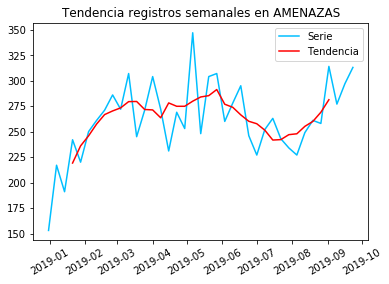

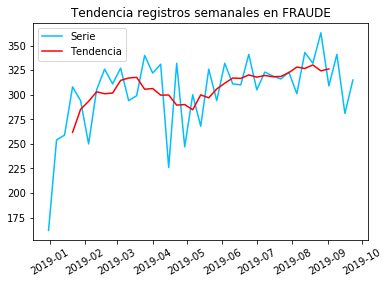

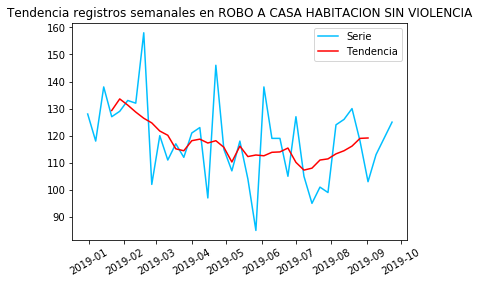

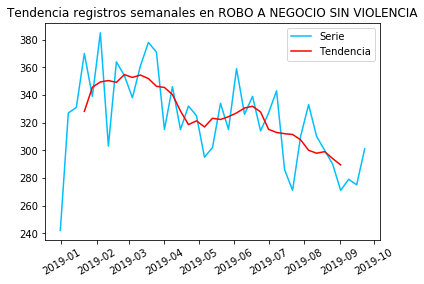

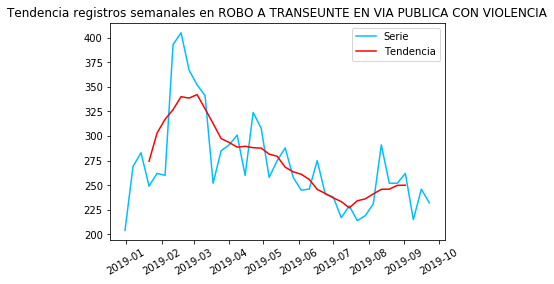

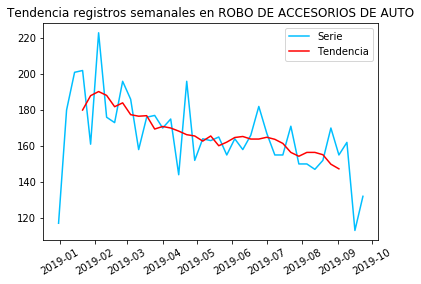

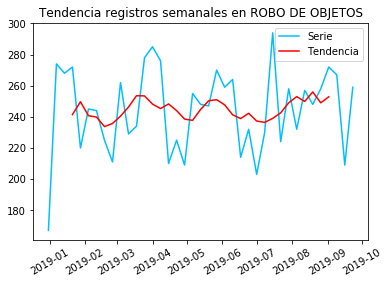

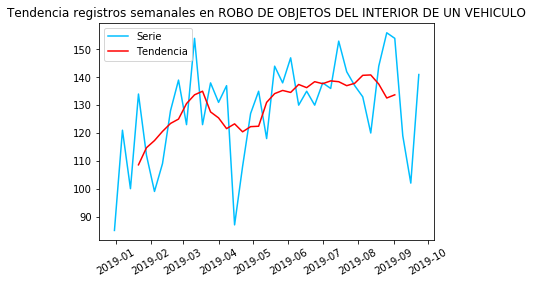

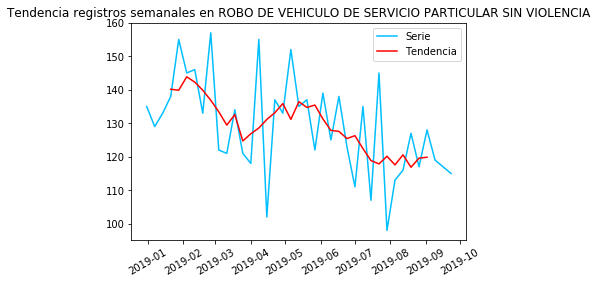

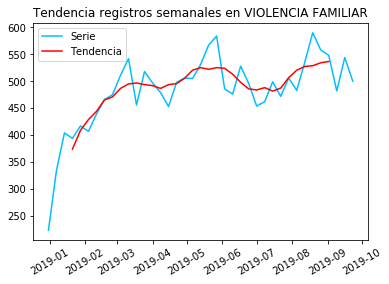

In [401]:
for d in count_del_mes_2019.delito.unique():
    #filtramos solamente para tener las observaciones de ese delito
    df = count_del_mes_2019[count_del_mes_2019.delito == d]
    
    #la fecha es el index
    data_set = df[['week_start', 'num_reg']].set_index(pd.DatetimeIndex(df['week_start']))
    
    # quitamos la última semana porque solo tiene un día
    data_set = data_set[data_set.week_start < "2019-09-30"]
    
    
    # descomponemos la serie
    decomposition = sm.tsa.seasonal_decompose(data_set['num_reg'], model = 'additive',
                                         freq = 7)
    # graficamos serie y tendencia
    plt.plot(data_set.index, data_set['num_reg'], c='deepskyblue')
    plt.plot(decomposition.trend.index, decomposition.trend, c='red')
    plt.legend(['Serie', 'Tendencia'])
    plt.xticks(rotation = 30)
    plt.title('Tendencia registros semanales en ' + d)
    plt.show()
    


Sobre los 10 delitos que acumulan el 50% de delitos podemos observar lo siguiente: 

+ Amenazas tiene una tendencia al alza


+ Fraude tiene una tendencia al alza


+ Robo a casa habitación tiene tendencia a la baja


+ Rodo a negocio sin violencia tiene tendencia a la baja


+ Robo a transeunte en vía pública con violencia tiene una tendencia a la baja


+ Robo de accesorios de auto tiene una tendencia a la baja


+ Robo de objetos tiene una tendencia muy ligera a la alza, pero en general los registros semanales fluctuan (mucho) alrededor de 240. 


+ Robo de objetos del interior de un vehículo tiene una tendencia al alza


+ Robo de vehículos de servicio particular sin violencia tiene una tendencia a la baja
 
 
+ Violencia familiar tiene una tendencia al alza. 

### Pregunta 5 - delitos en alcaldía

In [407]:
pgj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871354 entries, 0 to 871353
Data columns (total 19 columns):
ao_hechos               870982 non-null float64
mes_hechos              870982 non-null object
fecha_hechos            871354 non-null datetime64[ns]
delito                  871354 non-null object
categoria_delito        871354 non-null object
fiscalia                871354 non-null object
agencia                 871354 non-null object
unidad_investigacion    871129 non-null object
alcaldia_hechos         868268 non-null object
colonia_hechos          837068 non-null object
ao_inicio               871354 non-null int64
mes_inicio              871354 non-null object
fecha_inicio            871354 non-null datetime64[ns]
calle_hechos            868979 non-null object
calle_hechos2           351067 non-null object
longitud                837831 non-null float64
latitud                 837831 non-null float64
geopoint                837831 non-null object
year_hecho              8

In [404]:
pgj[pgj.alcaldia_hechos.isnull()].shape

(3086, 19)

In [406]:
(pgj[pgj.alcaldia_hechos.isnull()].shape[0] / pgj.shape[0])*100

0.35416145447200564

Antes de empezar, es importante notar que hay 3086 registros con valor vacío en alcaldía de hechos. Esto representa el 0.35% de los datos totales, lo cual es muy poco pero hay que tomarlo en cuenta. 

In [409]:
pgj.alcaldia_hechos.nunique()

448

Contamos con 448 valores de alcaldías distintos y por facilidad solo vamos a contar las alcaldías de la Ciudad de México porque a final de cuentas estamos analizando las Carpetas de investigación PGJ de la Ciudad de México. 

La lista de las alcaldías la sacamos de [aquí](https://datos.cdmx.gob.mx/explore/dataset/alcaldias/table/)

In [410]:
alcaldias_cdmx = ["TLALPAN", "VENUSTIANO CARRANZA", "AZCAPOTZALCO",
                 "IZTAPALAPA", "IZTACALCO", "MIGUEL HIDALGO", 
                 "LA MAGDALENA CONTRERAS", "COYOACAN", "MILPA ALTA",
                 "TLAHUAC", "BENITO JUAREZ","CUAJIMALPA DE MORELOS",
                 "GUSTAVO A MADERO", "CUAUHTEMOC", "ALVARO OBREGON",
                 "XOCHIMILCO"]

In [411]:
len(alcaldias_cdmx)

16

In [412]:
delitos_alcaldias_cdmx = pgj[pgj.alcaldia_hechos.isin(alcaldias_cdmx)]
delitos_alcaldias_cdmx.shape

(862372, 19)

In [417]:
(delitos_alcaldias_cdmx.shape[0] / pgj.shape[0]) * 100

98.96919047826715

Casi el 99% de los delitos del conjunto de datos ocurrieron en alguna de las 16 alcaldías de la Ciudad de México.

In [418]:
count_alcaldia = delitos_alcaldias_cdmx.groupby('alcaldia_hechos')['delito'].count().reset_index().sort_values(by = 'delito', ascending = False)
count_alcaldia["prop"] = np.round((count_alcaldia.delito / count_alcaldia.delito.sum()) *100 , 4)
count_alcaldia

,alcaldia_hechos,delito,prop
5,CUAUHTEMOC,141069,16.3583
8,IZTAPALAPA,129925,15.0660
6,GUSTAVO A MADERO,86334,10.0112
2,BENITO JUAREZ,75476,8.7521
3,COYOACAN,58309,6.7615
10,MIGUEL HIDALGO,57876,6.7113
0,ALVARO OBREGON,57175,6.6300
14,VENUSTIANO CARRANZA,50052,5.8040
13,TLALPAN,49882,5.7843
1,AZCAPOTZALCO,42153,4.8880


In [419]:
count_alcaldia.head(1)

,alcaldia_hechos,delito,prop
5,CUAUHTEMOC,141069,16.3583


In [420]:
count_alcaldia.tail(1)

,alcaldia_hechos,delito,prop
11,MILPA ALTA,5605,0.65


La alcaldía con más delitos registrados es Cuauhtémoc mientras que la alcaldía con menos delitos es Milpa Alta. 

Personalmente no creo sea un buen indicador de cuál es la alcaldía con más delitos, sino más bien un indicador de cuáles son las alcaldías donde más se reportan delitos y/o se inician carpetas de investigación. Podría atreverme a suponer que como las personas que viven en la alcaldía Cuauhtémoc son más jóvenes y con un nivel de educación alto por eso denuncian más. 

### Pregunta 6- 3 colonias con más delitos dentro de las alcaldías.

In [423]:
delitos_alcaldias_cdmx.columns

Index(['ao_hechos', 'mes_hechos', 'fecha_hechos', 'delito', 'categoria_delito', 'fiscalia', 'agencia', 'unidad_investigacion', 'alcaldia_hechos', 'colonia_hechos', 'ao_inicio', 'mes_inicio', 'fecha_inicio', 'calle_hechos', 'calle_hechos2', 'longitud', 'latitud', 'geopoint', 'year_hecho'], dtype='object')

Lo primero es ver el número de registros por alcaldía y colonia: 

In [441]:
count_alc_col = (delitos_alcaldias_cdmx
      .groupby(['alcaldia_hechos', 'colonia_hechos'])['delito']
      .count()
      .reset_index()
      .sort_values(by = ['alcaldia_hechos', 'delito'], 
                   ascending = False)
     
     )
count_alc_col

,alcaldia_hechos,colonia_hechos,delito
1721,XOCHIMILCO,SAN GREGORIO ATLAPULCO,1725
1744,XOCHIMILCO,SANTIAGO TEPALCATLALPAN,1377
1737,XOCHIMILCO,SANTA CRUZ ACALPIXCA - PUEBLO,1308
1658,XOCHIMILCO,BARRIO XALTOCAN,1302
1728,XOCHIMILCO,SAN LORENZO LA CEBADA,1275
1733,XOCHIMILCO,SAN MATEO XALPA,1275
1743,XOCHIMILCO,SANTA MARÍA TEPEPAN,1051
1730,XOCHIMILCO,SAN LUCAS XOCHIMANCA,782
1655,XOCHIMILCO,BARRIO SAN PEDRO,686
1732,XOCHIMILCO,SAN MARCOS NORTE,674


Ahora, por cada alcaldía obtenemos las tres colonias con más delitos:

In [442]:
top_colonias_alcadias = pd.DataFrame()
for a in count_alc_col.alcaldia_hechos.unique():
    fil = count_alc_col[count_alc_col.alcaldia_hechos == a].sort_values(by = 'delito', ascending = False)
    top = fil.head(3)
    top_colonias_alcadias = pd.concat([top_colonias_alcadias, top], axis = 0)
top_colonias_alcadias    

,alcaldia_hechos,colonia_hechos,delito
1721,XOCHIMILCO,SAN GREGORIO ATLAPULCO,1725
1744,XOCHIMILCO,SANTIAGO TEPALCATLALPAN,1377
1737,XOCHIMILCO,SANTA CRUZ ACALPIXCA - PUEBLO,1308
1593,VENUSTIANO CARRANZA,JARDÍN BALBUENA,4764
1601,VENUSTIANO CARRANZA,MOCTEZUMA 2A SECCIÓN,3828
1625,VENUSTIANO CARRANZA,ZONA CENTRO,3377
1489,TLALPAN,SAN ANDRÉS TOTOLTEPEC,3271
1521,TLALPAN,TLALPAN CENTRO I,1954
1397,TLALPAN,HÉROES DE PADIERNA,1937
1262,TLAHUAC,DEL MAR,1208


In [443]:
top_colonias_alcadias.shape

(48, 3)

Para cada una de las 16 alcaldías tenemos 3 colonias (16*3 = 48)

### Pregunta 7- tendencia estacional en ocurrencia de delitos

### Pregunta 8- delitos que más caracterizan a cada alcaldía

Es decir, delitos que suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás. 

In [494]:
count_alcaldia.head()

,alcaldia_hechos,total_alc,prop
5,CUAUHTEMOC,141069,16.3583
8,IZTAPALAPA,129925,15.0660
6,GUSTAVO A MADERO,86334,10.0112
2,BENITO JUAREZ,75476,8.7521
3,COYOACAN,58309,6.7615


In [496]:
alcaldias_delitos_ct = pd.crosstab(delitos_alcaldias_cdmx.alcaldia_hechos, delitos_alcaldias_cdmx.delito)
alcaldias_delitos_ct

delito,ABANDONO DE PERSONA,ABORTO,ABUSO DE AUTORIDAD,ABUSO DE CONFIANZA,ABUSO SEXUAL,ACOSO SEXUAL,ALLANAMIENTO DE MORADA,AMENAZAS,ASOCIACION DELICTUOSA,ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS O MEDIOS DE TRANSPORTE),ATAQUE A LAS VIAS GENERALES DE COMUNICACIÓN,ATAQUES A LA PAZ PUBLICA,BIGAMIA,CALUMNIAS,CAMBIO DE USO DE SUELO,COACCION DE SERVIDORES PUBLICOS,COBRANZA ILEGITIMA,COHECHO,CONCUSION,CONTAGIO VENERERO,CONTAMINACIÓN O RESIDUOS,CONTRA EL ESTADO CIVIL,CONTRA FUNCIONARIOS PUBLICOS,CONTRA LA LEY GENERAL DE EXPLOSIVOS,CORRUPCION DE MENORES,CORRUPCION DE MENORES E INCAPACES,DAÑO EN PROPIEDAD AJENA CULPOSA,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A BIENES INMUEBLES,DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A VIAS DE COMUNICACION,DAÑO EN PROPIEDAD AJENA INTENCIONAL,DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL,DAÑO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES,DAÑO EN PROPIEDAD AJENA INTENCIONAL A CASA HABITACION,DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO,DAÑO EN PROPIEDAD AJENA INTENCIONAL A VIAS DE COMUNICACION,"DAÑO SUELO (ACTIVIDAD, INVASIÓN O EXTRACCIÓN)",DDH ANONIMAS,DDH CERESO,DDH FDS,DDH FRVT,DDH INCOMPETENCIA,DDH OFICIO COLABORACION,DDH OTRAS MATERIAS,DDH REDES,DDH RELACIONADAS,DDH SIN DATOS,DELITOS AMBIENTALES,DELITOS CONTRA LA SALUD,DELITOS DE ABOGADOS PATRONOS Y LITIGANTES,DELITOS ELECTORALES,DENUNCIA DE HECHOS,DENUNCIA DE HECHOS POR ROBO DE CELULAR,DESACATO,DESAPARICION FORZADA DE PERSONAS,DESOBEDENCIA DE PARTICULARES,DESPOJO,DIFAMACION,DISCRIMINACION,DISPAROS DE ARMA DE FUEGO,EJERCICIO ABUSIVO DE FUNCIONES,EJERCICIO INDEBIDO DEL SERVIDOR PUBLICO,ENCUBRIMIENTO,ENRIQUECIMIENTO ILICITO,ENTREGA ILEGITIMA DE UN MENOR,ESTUPRO,EVASION DE PRESOS,EXHORTOS,EXPLOTACIÓN DE MENOR O DISCAPACITADO,EXPOSICION DE MENORES,EXTORSION,FALSEDAD DE DECLARACIONES,FALSIFICACION DE DOCUMENTOS,"FALSIFICACION DE SELLOS, MARCAS, LLAVES Y OTROS",FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMENTOS DE CREDITO PUBLICO,FEMINICIDIO,FRAUDE,GESTIÓN AMBIENTAL,HOMICIDIO CULPOSO,HOMICIDIO CULPOSO FUERA DEL D.F (ATROPELLADO),HOMICIDIO CULPOSO FUERA DEL D.F (COLISION),HOMICIDIO CULPOSO POR ARMA DE FUEGO,HOMICIDIO CULPOSO POR INSTRUMENTO PUNZO CORTANTE,HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR,HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (ATROPELLADO),HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (CAIDA),HOMICIDIO CULPOSO POR TRÁNSITO VEHICULAR (COLISION),HOMICIDIO POR AHORCAMIENTO,HOMICIDIO POR ARMA BLANCA,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO POR GOLPES,HOMICIDIOS INTENCIONALES (OTROS),INHUMACIONES Y/O EXHUMACIONES,INSOLVENCIA ALIMENTARIA,INTIMIDACION,"INTIMIDACION (EVITAR DENUNCIA, APORTE INFORMACIÓN O PRUEBAS)",LA ADMINISTRACION DE JUSTICIA,LENOCINIO,LESIONES CULPOSAS,LESIONES CULPOSAS ACCIDENTE LABORAL,LESIONES CULPOSAS POR CAIDA,LESIONES CULPOSAS POR CAIDA DE VEHÍCULO EN MOVIMIENTO,LESIONES CULPOSAS POR QUEMADURAS,LESIONES CULPOSAS POR TRANSITO VEHICULAR,LESIONES CULPOSAS POR TRANSITO VEHICULAR EN COLISION,LESIONES INTENCIONALES,LESIONES INTENCIONALES POR ARMA BLANCA,LESIONES INTENCIONALES POR ARMA DE FUEGO,LESIONES INTENCIONALES POR GOLPES,LESIONES INTENCIONALES Y ROBO DE VEHICULO,MALTRATO ANIMAL,MOTIN,NARCOMENUDEO POSESION SIMPLE,"NARCOMENUDEO POSESIÓN CON FINES DE VENTA, COMERCIO Y SUMINISTRO",NEGACION DEL SERVICIO PUBLICO,OPERACIONES CON RECURSOS DE PROCEDENCIA ILICITA,OPOSICION A LA OBRA PUBLICA,OTROS CULPOSOS,OTROS DELITOS,PECULADO,PELIGRO DE CONTAGIO,PERDIDA DE LA VIDA ASFIXIA POR ALIMENTOS/ LIQUIDOS,PERDIDA DE LA VIDA POR ACCIDENTE LABORAL,PERDIDA DE LA VIDA POR AHOGAMIENTO,PERDIDA DE LA VIDA POR ASFIXIA,PERDIDA DE LA VIDA POR CAIDA,PERDIDA DE LA VIDA POR CONGESTION ALCOHOLICA,PERDIDA DE LA VIDA POR DERRUMBE,PERDIDA DE LA VIDA POR ENFERMEDAD,PERDIDA DE LA VIDA POR ENVENENAMIENTO,PERDIDA DE LA VIDA POR INTOXICACION,PERDIDA DE LA VIDA POR OTRAS CAUSAS,PERDIDA DE LA VIDA POR PARO CARDIACO,PERDIDA DE LA VIDA POR PRECIPITACION,PERDIDA DE LA VIDA POR Q

La tabla nos permite analizar el número de registros (frecuencia) de cierto delito por cada alcaldía. 

La tabla es poco amigable por los 277 valores; sin embargo, si hacíamos la tabla con categoría delito los resultados no tenían el suficiente detalle pues la categoría del 76% de los delitos es "delito de bajo impacto". 

Para leer la tabla: si sumamos por renglón obtenemos el número total de registros por alcaldía, si sumamos por columna obtenemos el número de registros por delito. 

Por ejemplo, si tomamos las primeras 8 columnas podemos ver que un delito de alta frecuencia en la alcaldía Álvaro Obregón es AMENAZAS, pero este delito es menos frecuente MILPA ALTA o CUAJIMALPA DE MORELOS. 

Creo que algo muy útil sería crear una clasificación de delitos que sea más específica que categoría delito, pero con menos cardinalidad que delito. 

### Pregunta 9 -  homocidios dolosos por cada 100 habitantes anual para AGEB

In [ ]:
# obtener el número de habitantes por AGEB
# usar shapefiles de Diego Valle de agebs urbanas y usar leaflets en R
# filtrar los datos de delitos en alcaldías de tal manera que obtengamos la categoria_delito == HOMICIDIO DOLOSO
# buscar función para checar si un punto (latitud, longitud) o (latitud, longitud) están dentro del polígono de ageb
    # y así ligar población y números de homicidios dolosos por ageb

In [444]:
delitos_alcaldias_cdmx.columns

Index(['ao_hechos', 'mes_hechos', 'fecha_hechos', 'delito', 'categoria_delito', 'fiscalia', 'agencia', 'unidad_investigacion', 'alcaldia_hechos', 'colonia_hechos', 'ao_inicio', 'mes_inicio', 'fecha_inicio', 'calle_hechos', 'calle_hechos2', 'longitud', 'latitud', 'geopoint', 'year_hecho'], dtype='object')

In [500]:
delitos_alcaldias_cdmx[delitos_alcaldias_cdmx.categoria_delito.str.contains('DOLOSO')].head()

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,year_hecho
19,2017.0,Enero,2017-01-01 08:30:00,HOMICIDIO POR ARMA BLANCA,HOMICIDIO DOLOSO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-8,UI-3CD,GUSTAVO A MADERO,SAN JUAN DE ARAGÓN VII SECCIÓN,2017,Enero,2017-01-01 10:32:16,AVENIDA 414,AVENIDA 469,-99.079099,19.470465,"19.4704649094,-99.0790986489",2017
267,2017.0,Enero,2017-01-03 02:07:00,HOMICIDIO POR ARMA BLANCA,HOMICIDIO DOLOSO,INVESTIGACIÓN EN COYOACÁN,COY-5,UI-1SD,COYOACAN,CULHUACÁN CTM SECCIÓN IX,2017,Enero,2017-01-03 02:05:37,MAUELA MEDINA,ELVIRA VARGAS,-99.107514,19.312715,"19.3127153493,-99.107514219",2017
597,2017.0,Enero,2017-01-04 14:17:00,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,INVESTIGACIÓN EN VENUSTIANO CARRANZA,VC-1,UI-1SD,VENUSTIANO CARRANZA,ZONA CENTRO,2017,Enero,2017-01-04 17:43:15,LECUMBERRI,NICOLAS BRAVO,-99.122285,19.437327,"19.4373265224,-99.1222846534",2017
665,2017.0,Enero,2017-01-05 01:28:00,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,INVESTIGACIÓN EN IZTAPALAPA,IZP-4,UI-3SD,IZTAPALAPA,ACULCO,2017,Enero,2017-01-05 03:29:29,BAJA CALIFORNIA,SONORA,-99.103640,19.376269,"19.3762690091,-99.1036403535",2017
969,2017.0,Enero,2017-01-06 16:15:00,HOMICIDIO POR GOLPES,HOMICIDIO DOLOSO,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-1,UI-2SD,TLALPAN,LA PRIMAVERA,2017,Enero,2017-01-06 16:15:49,PASEO JAZMIN Y PASEO PENSAMIENTO,NOTIFICACION HOSPITALARIA HOSPITAL DR. DARIO F...,-99.202809,19.267625,"19.2676254117,-99.2028086007",2017


### Pregunta 10- indicador de inseguridad

In [501]:
# Creo un buen indicar de inseguridad sería calcular número de delitos/número de habitantes por AGEB
# por AGEB porque idealmente tenemos esta info de la pregunta 9
# creo que sería muy interesanre ver aquellas agebs donde el indicador es cercano a 1 pues eso indicaría que 
    # que el número de delitos es muy cercano al número de habitantes

# Como indiqué en respuestas anteriores, creo que la apertura de carpetas no reflejan totalmente la realidad de los
#delitos, sino reflejan los pocos delitos que sí son denunciados

### Pregunta 11 - encontrar pátrones

In [ ]:
# Creo que K-Medias sería de mucha utilidad pues crea grupos según distancia entre puntos y define centros
# Usaría one-hot-encoding para usar variables categóricas como categoría delito

### Pregunta 12- robo a pasejeros de transporte público

In [ ]:
# antes de lanzarnos a buscar fuentes externas, lo primero que haría sería trazar estos puntos de latitud y longitud
# en el mapa y ver si hay algún patrón evidente. 